<h1>The Battle of Neighborhoods (Week 1)</h1>

<h2>Predicting the ideal restaurant to invest in Manhattan</h2>

<h3>1. Project Overview</h3>

<h4>1.1. BackGround</h4>

Manhattan often referred to by residents of the New York City area as the City, is the most densely populated of the five boroughs of New York City, and coextensive with the County of New York, one of the original counties of the U.S. state of New York. Manhattan serves as the city's economic and administrative center, cultural identifier, and historical birthplace. Manhattan has been described as the cultural, financial, media, and entertainment capital of the world. Many districts and landmarks in Manhattan are well known, as New York City received a record 62.8 million tourists in 2017, and Manhattan hosts three of the world's 10 most-visited tourist attractions in 2013: Times Square, Central Park, and Grand Central Terminal. It seems to be the best place for small and big investors. For this reason, we will evaluate the demand vs. restaurant market in the Manhattam Neighborhood and predict the best options for opening a local restaurant

<h4>1.2. Problem and Interest</h4>

This Data Analysis applied in Manhattan Neighborhood may help investors and entrepreneurs who recently migrated or are planning to migrate to Manhattan to invest in the local market.

<h3> 2. Data Acquisition and wrangling<h3/>

<h4>2.1. Data Sources<h4/>

In this project we are going to use the United States census for market demand information that can be found in these links: https://www.census.gov/quickfacts/fact/table/newyorkcountymanhattanboroughnewyork/PST045219#PST045219  
https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml?src=bkmk
https://censusreporter.org/profiles/06000US3606144919-manhattan-borough-new-york-county-ny/

And to Download and Explore the Mannhattan Dataset, using the foursquare API, as well.

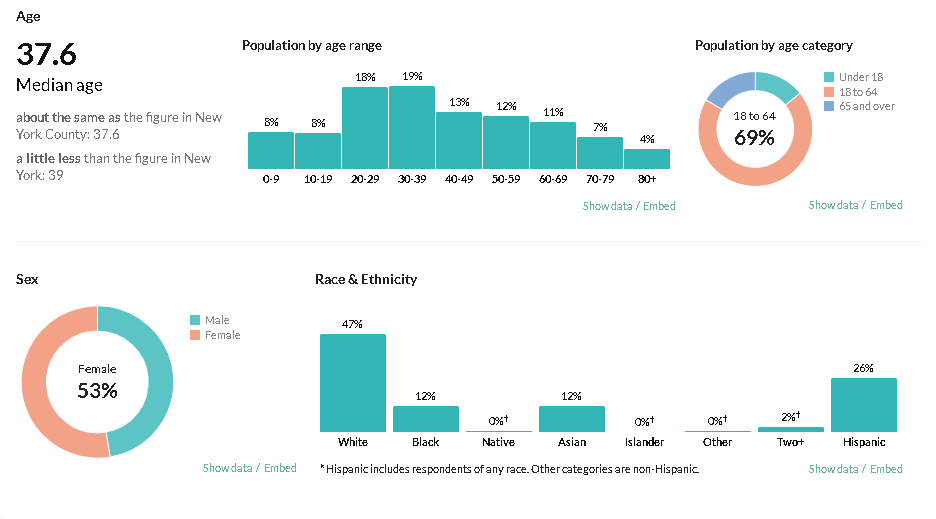

In [8]:
from IPython.display import Image

PATH = "/resources/labs/DP0701EN/manhattan-census.png"
Image(filename = PATH , width=1000, height=1000)

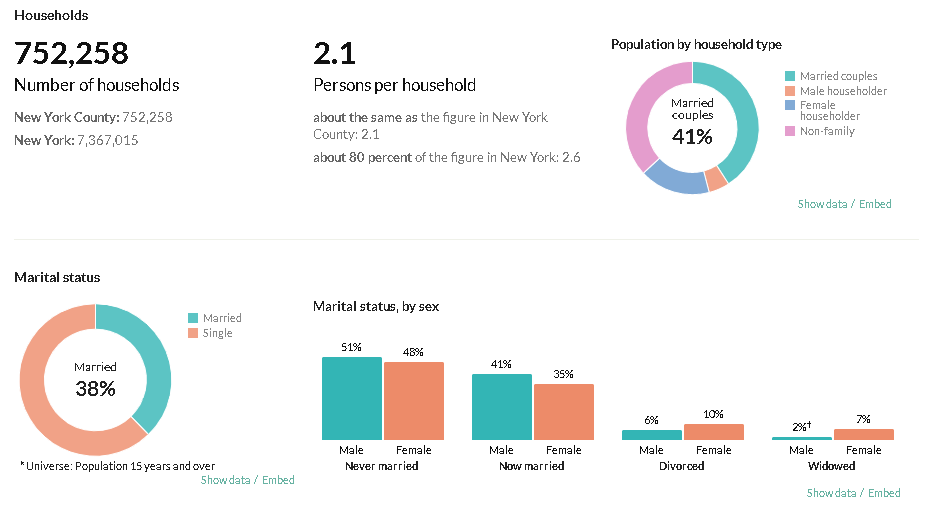

In [9]:

PATH = "/resources/labs/DP0701EN/manhattan_marital.png"
Image(filename = PATH , width=1000, height=1000)


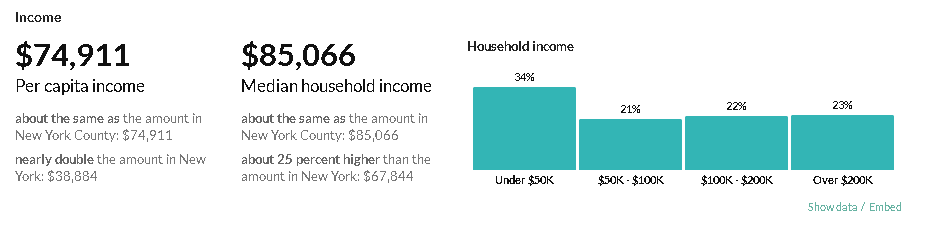

In [10]:

PATH = "/resources/labs/DP0701EN/manhattan_income.png"
Image(filename = PATH , width=1000, height=1000)


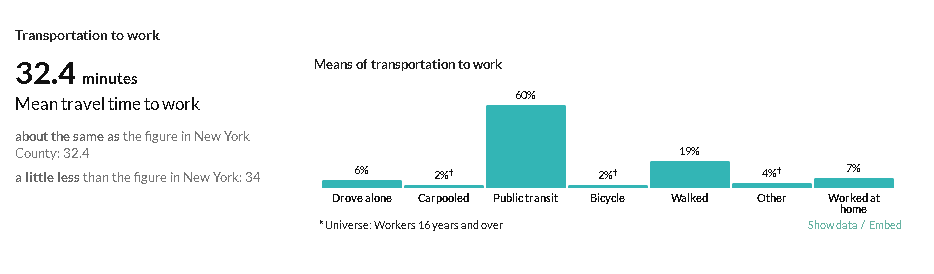

In [12]:

PATH = "/resources/labs/DP0701EN/manhattan-transport.png"
Image(filename = PATH , width=1000, height=1000)

<h4>According to census data Bureau (2018) of Manhattan Borough, New York County - NY, find below key points to be considered:</h4>


- **Median Age** is worth **37** / **50%** with age range **between 20 and 49**
- **53% female** sex
- **47% white** hispanic ethinian 
- **62% single** marital status  
- Average **Income** per capita **$ 74,911** / **34%** under **50k** and **43% betweem 50k-200k**
- **60%** population uses **public transit to work**

<h4>2.2. Data Wrangling</h4>

Firstly, to scrape the  Manhattan census data to help predict which is better kind of restaurant to invest.

Second, to drop all information that is not relevant for the Data Analysis.

<h3>3. Exploratory Data Analysis<h3/>

<h4>3.1. Calculation of target audience<h4/> 

Analyzing some Population Characteristics, such Race, Age & Sex and Economy data, such as Business, Industry, Average Income & retail sales per capita, analyzing:
- Relationship between Age & Sex;
- Relationship between Race and Origin Culture
- Relationship between Income & retail sales per capita

<h3>4. Predicting Models</h3>

There are many models for clustering out there. In this project, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

Applications of k-means for to predict the ideal restaurant to invest:

- Customer segmentation
- Pattern recognition
- Machine learning
- Data compression

<h3>5. Starting code and analysis</h3>

Dowloading the dependencias we will need

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    lib

Dowload and exploring data

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


<h4>Create a map of Manhattan with neighborhoods superimposed on top.<h4>

In [8]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [9]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [10]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [11]:
CLIENT_ID = 'HCDXIBA200P5SXVDQETVDPPQBWKH4NDOWCMKXRAMMBYQBNFU' # your Foursquare ID
CLIENT_SECRET = 'NQJFNFCC54LEIIG0IUBTN2BH4DTGXHCERIXYQDAE3RHVRWE5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HCDXIBA200P5SXVDQETVDPPQBWKH4NDOWCMKXRAMMBYQBNFU
CLIENT_SECRET:NQJFNFCC54LEIIG0IUBTN2BH4DTGXHCERIXYQDAE3RHVRWE5


<h4>Exploring neighborhoods in Manhattan</h4>

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


<h4>Analizing each neighborhood</h4>

In [14]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping 

In [15]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping 

In [17]:
Gym_Col =[x for x in manhattan_grouped.columns[manhattan_grouped.columns.str.contains('Gym')]]
print(Gym_Col)

['Boxing Gym', 'Climbing Gym', 'Gym', 'Gym / Fitness Center', 'Gym Pool', 'Gymnastics Gym']


In [18]:
# analyzing where type of Gym
df = manhattan_grouped.filter(like = 'Gym', axis=1)
df

,Boxing Gym,Climbing Gym,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym
0,0.000000,0.000,0.030928,0.000000,0.00,0.00
1,0.000000,0.000,0.030303,0.020202,0.00,0.00
2,0.000000,0.000,0.022222,0.022222,0.00,0.00
3,0.000000,0.000,0.010000,0.010000,0.00,0.00
4,0.000000,0.000,0.010000,0.000000,0.00,0.00
5,0.010000,0.000,0.020000,0.050000,0.00,0.00
6,0.000000,0.000,0.030000,0.050000,0.00,0.00
7,0.000000,0.000,0.025641,0.000000,0.00,0.00
8,0.000000,0.000,0.000000,0.000000,0.00,0.00
9,0.000000,0.000,0.040000,0.030000,0.00,0.00


In [19]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
            venue  freq
0            Park  0.07
1     Coffee Shop  0.05
2           Hotel  0.05
3             Gym  0.03
4  Clothing Store  0.03


----Carnegie Hill----
                 venue  freq
0          Coffee Shop  0.07
1          Pizza Place  0.06
2       Cosmetics Shop  0.04
3          Yoga Studio  0.03
4  Japanese Restaurant  0.03


----Central Harlem----
                 venue  freq
0   African Restaurant  0.07
1                  Bar  0.04
2   Chinese Restaurant  0.04
3  American Restaurant  0.04
4    French Restaurant  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1              Bakery  0.05
2  Italian Restaurant  0.04
3      Ice Cream Shop  0.04
4           Nightclub  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.11
1  American Restaurant  0.04
2         Cocktail Bar  0.04
3                  Spa  0.03
4   Salon / Barbershop  0.03


----Civic Center----
                  venue  freq


<h3>Creating a dataframe with the data above</h3>

In [20]:
#sorting the venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
#top 10 venue for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Wine Shop,Boat or Ferry,Gym,Women's Store,Memorial Site,Clothing Store,Plaza
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Bookstore,Bakery,French Restaurant,Gym,Japanese Restaurant,Yoga Studio,Café
2,Central Harlem,African Restaurant,Seafood Restaurant,American Restaurant,Bar,French Restaurant,Chinese Restaurant,Music Venue,Tapas Restaurant,Market,Bookstore
3,Chelsea,Coffee Shop,Bakery,Ice Cream Shop,Italian Restaurant,American Restaurant,Nightclub,Wine Shop,Theater,Hotel,Bookstore
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Optical Shop,Bakery,Hotpot Restaurant,Spa,Salon / Barbershop,Boutique


In [22]:
# creating a dataframe with Gym's frequency in each neighborhood was appeared
data_Gym = {'Neighborhood': ['Battery Park City','Carnegie Hill','Civic Center','Clinton','Financial District','Hudson Yards','Roosevelt Island','Sutton Place','Yorkville'], 
        'freq_gym': [0.04,0.03,0.06,0.04,0.03,0.05,0.03,0.06,0.06]} 


In [23]:
df_Gym = pd.DataFrame(data_Gym)

In [24]:
df_Gym

,Neighborhood,freq_gym
0,Battery Park City,0.04
1,Carnegie Hill,0.03
2,Civic Center,0.06
3,Clinton,0.04
4,Financial District,0.03
5,Hudson Yards,0.05
6,Roosevelt Island,0.03
7,Sutton Place,0.06
8,Yorkville,0.06


<h3>Clustering Neighborhood</h3>

In [25]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 0, 0, 0, 0, 0, 4, 1, 3], dtype=int32)

In [26]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Coffee Shop,Sandwich Place,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Cocktail Bar,American Restaurant,Vietnamese Restaurant,Optical Shop,Bakery,Hotpot Restaurant,Spa,Salon / Barbershop,Boutique
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Deli / Bodega,Bakery,Grocery Store,Mobile Phone Shop,Gym,Mexican Restaurant,Chinese Restaurant,Latin American Restaurant,Tapas Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Restaurant,Café,Lounge,Pizza Place,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant,American Restaurant,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Deli / Bodega,Mexican Restaurant,Coffee Shop,Sandwich Place,Caribbean Restaurant,Chinese Restaurant,School,Yoga Studio


In [27]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
#Analyzing clusters and matching to Neighborhood with more Gym's frequency
clusterGym = [3,1,0,0,3,0,3,1,4]
df_Gym['Cluster'] = clusterGym

In [ ]:
df_Gym

<h3>5. Conclusion</h3>

<h4>5.1. Census Analysis<h4/>

Accordingly to the Bureau census (2018) of Manhattan Borough:
- the Median Age is worth 37 and 53% female sex, which means there must be a concerned mind set for healthy issues. 
- The Average Income per capita $74,911, nearly double the amount of New York.
- 62% of population are single, which means likely eat out.


Considering that people is aiming more and more for a healthy life, in this business plan we will focus in a restaurant that provides a healthy and tasty menu, accordingly to the needs of each person and Gym’s location and best frequency. 


<h4>5.1. Clustering Neighborhoods<h4/> 

Based on the Clustering Neighborhoods, we concluded that cluster 0 (red color) has a closer and more relevant scope for the healthy food market, considering together the analysis of the highest gym frequency index. The result for this analysis were the neighborhoods below:
- Civic Centre
- Clinton
- Hudson Yards